In [1]:
# Importing packages

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import fnmatch

In [2]:
# Loading datasets
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

### Initial EDA and Cleaning
I started off by checking the column names to see if any needed to be renamed and the data types for each column. Both seemed fine, so I made no changes.

In [3]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
print('DF length is ' + str(len(train)))
train.describe()

DF length is 891


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print('DF length is ' + str(len(test)))
test.describe()

DF length is 418


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Missing Ages

After, I checked the summary statistics for both datasets and that was when I first noticed two potential issues. The first was missing values for Age in each dataset and I explorered it further to investigate what was going on.

In [6]:
print('The percentage of null age values for the train dataset is ' 
      + str(round(train['Age'].isnull().sum()/len(train),6)*100) 
      + ' and the percentage for test is '
      + str(round(test['Age'].isnull().sum()/len(test),6)*100))

The percentage of null age values for the train dataset is 19.8653 and the percentage for test is 20.5742


In [7]:
test_noage = test.loc[test['Age'].isnull()]
print('The number of passengers without a recorded age in the test dataset is: '
      + str(len(test_noage)))
test_noage

The number of passengers without a recorded age in the test dataset is: 86


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
train_noage = train.loc[train['Age'].isnull()]
print('The number of passengers without a recorded age in the test dataset is: '
      + str(len(train_noage)))
train_noage

The number of passengers without a recorded age in the test dataset is: 177


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


Overall, I was not really able to tell why the age values were missing and it is possible they just were never recorded. There seemed to be no real pattern as to why the ages were missing and they were missing in roughly equal porportions for test and train with 20.6% vs 19.7% respectively. Originally I had decided to leave the nulls as is, but changed my mind and imputed values in section 3.2.

#### Missing Fares
I also noticed that both datasets had a minimum fare of 0 listed. I was unsure of what this figure would represent, so I decided to investigate it further. However, there was another issue with the test dataset having a single null fare for one of its passengers which I looked into first.

In [9]:
test_nofare = test.loc[test['Fare'].isnull()]
test_nofare

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [10]:
test_nofare = test.loc[test['Fare'] <=1]
test_nofare

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S


In [11]:
train_nofare = train.loc[train['Fare'] <=1]
train_nofare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


Overall, it seemed that only male passengers that departed from Southampton had values of 0 for their fares. As Southampton was where the Titanic initially launched, it made me think they were either crew or passengers with comp'ed tickets, such as reporters or investors. Therefore, I left these values as is and imputed a fare of 0 for the single missing value.  

In [12]:
test['Fare'] = test['Fare'].fillna(0)

### Feature Engineering

- Title
- Family Size
- Cabin
- Crew vs Passenger

#### Title
When looking at the data, I noticed that there were titles provided for each passenger, i.e. Mr, Mrs, Miss, etc. I was unsure if this data would improve performance, but mining the titles from the name field could provide additional information to help the model. 

In [13]:
for i in range(20):
    print(test['Name'][i])

Kelly, Mr. James
Wilkes, Mrs. James (Ellen Needs)
Myles, Mr. Thomas Francis
Wirz, Mr. Albert
Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Svensson, Mr. Johan Cervin
Connolly, Miss. Kate
Caldwell, Mr. Albert Francis
Abrahim, Mrs. Joseph (Sophie Halaut Easu)
Davies, Mr. John Samuel
Ilieff, Mr. Ylio
Jones, Mr. Charles Cresson
Snyder, Mrs. John Pillsbury (Nelle Stevenson)
Howard, Mr. Benjamin
Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)
del Carlo, Mrs. Sebastiano (Argenia Genovesi)
Keane, Mr. Daniel
Assaf, Mr. Gerios
Ilmakangas, Miss. Ida Livija
Assaf Khalil, Mrs. Mariana (Miriam")"


In [14]:
def get_titles(dataset):
    temp_list=[]
    for index, row in dataset.iterrows():
        try:
            x = re.search(', (.+?) .', row['Name']).group(1)
            # re would only provide the first letter of the title if
            # I did not include the space before the period
            x = x.replace('.','')
            # However, this added the period in the title, so the above line removes it
        except AttributeError:
            x = np.nan
            # This line just adds a null in case re does not find any title
        temp_list.append(x)
    dataset['Title'] = temp_list

In [15]:
get_titles(train)
get_titles(test)

After the titles were extracted, I began to wonder how I could use them and how to best combine the titles that only a few passengers had.

In [16]:
print(train['Title'].value_counts(),
      "\n\n",
      test['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Capt          1
Mme           1
Lady          1
Ms            1
the           1
Jonkheer      1
Sir           1
Don           1
Name: Title, dtype: int64 

 Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64


In [17]:
train.groupby(['Title']).agg({'Fare': ['count','mean']})

Fare           
         count       mean
Title                    
Capt         1  71.000000
Col          2  31.025000
Don          1  27.720800
Dr           7  49.168457
Jonkheer     1   0.000000
Lady         1  39.600000
Major        2  28.525000
Master      40  34.703125
Miss       182  43.797873
Mlle         2  59.402100
Mme          1  69.300000
Mr         517  24.441560
Mrs        125  45.138533
Ms           1  13.000000
Rev          6  18.312500
Sir          1  56.929200
the          1  86.500000

In [18]:
test.groupby(['Title']).agg({'Fare': ['count','mean']})

Fare            
       count        mean
Title                   
Col        2  128.012500
Dona       1  108.900000
Dr         1   81.858300
Master    21   38.494043
Miss      78   40.087876
Mr       240   25.456788
Mrs       72   59.974249
Ms         1    7.750000
Rev        2   19.500000

In [19]:
# Examining what the 'the' title is

train.loc[train['Title'] == 'the']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,the


In [20]:
# Examining the 'Master' title

test.loc[test['Title'] == 'Master']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
21,913,3,"Olsen, Master. Artur Karl",male,9.00,0,1,C 17368,3.1708,NaN,S,Master
55,947,3,"Rice, Master. Albert",male,10.00,4,1,382652,29.1250,NaN,Q,Master
64,956,1,"Ryerson, Master. John Borie",male,13.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Master
80,972,3,"Boulos, Master. Akar",male,6.00,1,1,2678,15.2458,NaN,C,Master
89,981,2,"Wells, Master. Ralph Lester",male,2.00,1,1,29103,23.0000,NaN,S,Master
154,1046,3,"Asplund, Master. Filip Oscar",male,13.00,4,2,347077,31.3875,NaN,S,Master
161,1053,3,"Touma, Master. Georges Youssef",male,7.00,1,1,2650,15.2458,NaN,C,Master
192,1084,3,"van Billiard, Master. Walter John",male,11.50,1,1,A/5. 851,14.5000,NaN,S,Master
194,1086,2,"Drew, Master. Marshall Brines",male,8.00,0,2,28220,32.5000,NaN,S,Master
196,1088,1,"Spedden, Master. Robert Douglas",male,6.00,0,2,16966,134.5000,E34,C,Master


Originally, I thought I would be able to use the titles to define social class which could help determine where the passengers were located on the Titanic. However, I did not really find a strong indicator that showed that this feature would be helpful with this approach.
<br>
<br>
Instead, I thought the best way to deal with the titles was to combine them into a few categories: Mr, Mrs, Miss and Master. These four would break up the passengers into 4 categories based on gender and young or old. While some class data would be lost with this approach, it would still be captured in 'Pclass' and the individual fare amount. 
<br>
<br>
The four categories would also help to infer age information for passengers missing this data, with Miss and Master for usually younger females and males respectively. The caveats are that Miss is used for unmarried females of any age and some males become Mr despite being younger. If this aspect needs to be revisted later on, changes could be made to add some filtering based on age as well.

In [21]:
train.groupby(['Title']).agg({'Age': ['count','min','mean','max']})

Age                        
         count    min       mean   max
Title                                 
Capt         1  70.00  70.000000  70.0
Col          2  56.00  58.000000  60.0
Don          1  40.00  40.000000  40.0
Dr           6  23.00  42.000000  54.0
Jonkheer     1  38.00  38.000000  38.0
Lady         1  48.00  48.000000  48.0
Major        2  45.00  48.500000  52.0
Master      36   0.42   4.574167  12.0
Miss       146   0.75  21.773973  63.0
Mlle         2  24.00  24.000000  24.0
Mme          1  24.00  24.000000  24.0
Mr         398  11.00  32.368090  80.0
Mrs        108  14.00  35.898148  63.0
Ms           1  28.00  28.000000  28.0
Rev          6  27.00  43.166667  57.0
Sir          1  49.00  49.000000  49.0
the          1  33.00  33.000000  33.0

In [22]:
def title_change(x):
    title=x['Title']
    if title in ['Capt','Col','Don','Jonkheer','Major','Rev','Sir']:
        return 'Mr'
    elif title in ['Lady','Mme','the','Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [23]:
train['Title']=train.apply(title_change, axis=1)
test['Title']=test.apply(title_change, axis=1)

In [24]:
train.groupby(['Title']).agg({'Age': ['count','min','mean','max']})

Age                        
       count    min       mean   max
Title                               
Master    36   0.42   4.574167  12.0
Miss     149   0.75  21.845638  63.0
Mr       412  11.00  32.891990  80.0
Mrs      117  14.00  36.188034  63.0

#### Family Size
With the two columns, SibSp and Parch, data is provided listing if the passenger travelled with any siblings or parents respectively. By adding these two columns together, an idea for family size can be created, indicating how large a family may be on a ship. This feature could provide insights into how willing a passenger was to leave by themselves on a lifeboat or if they needed to wait or search for family members.

In [25]:
def create_FamSize(dataset):
    temp_list=[]
    for index, row in dataset.iterrows():
        x = row['SibSp'] + row['Parch']
        temp_list.append(x)
    dataset['FamSize'] = temp_list

In [26]:
create_FamSize(train)
create_FamSize(test)

In [27]:
train['FamSize'].describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: FamSize, dtype: float64

#### Cabin
When the Titanic hit the iceberg, it was at 2:20am and the majority of the passengers were most likely in their cabins. If the lifeboats were launched mainly from the main deck, passengers in higher levels would theoretically be able to leave the sinking ship sooner.

In [28]:
train_cabins = train.loc[train['Cabin'].notnull()]
train_cabins['Cabin'].values
# All the values seem to have a letter first followed by numbers. Just extracting the letter should be enough for this feature with no outlying formats. I will test this later to make sure.

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73',
       'C23 C25 C27', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60',
       'E101', 'D26', 'F E69', 'D47', 'C123', 'B86', 'F2', 'C2', 'E33',
       'B19', 'A7', 'C49', 'F4', 'A32', 'F2', 'B4', 'B80', 'G6', 'A31',
       'D36', 'D15', 'C93', 'C83', 'C78', 'D35', 'G6', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'B58 B60', 'E101', 'C22 C26', 'C65', 'E36',
       'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'D', 'B18', 'C124',
       'C91', 'C2', 'E40', 'T', 'F2', 'C23 C25 C27', 'F33', 'C128', 'E33',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'D36', 'G6', 'C78', 'E10',
       'C52', 'E44', 'B96 B98', 'C23 C25 C27', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'D', 'A14', 'B49', 'C93', 'B37',
       'C30', 'D20', 'C22 C26', 'B79', 'C65', 'E25', 'D46', 'F33', 'B73',


In [29]:
def create_Deck(dataset):
    temp_list=[]
    for index, row in dataset.iterrows():
        try:
            x = row['Cabin'][:1]
        except:
            x = np.nan
        temp_list.append(x)
    dataset['Deck'] = temp_list

In [30]:
create_Deck(train)
create_Deck(test)

In [31]:
print(train['Deck'].value_counts(),"\n\n",
      test['Deck'].value_counts())

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64 

 C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Deck, dtype: int64


#### Crew vs Passenger
For this feature, I thought it would be helpful to distinguish between crew and passengers with the hypothesis that more crew would perish as they were attempting to help others off the Titanic. 

However, I was unable to find a solid way of determining who was crew, so I left this feature as a note without creating it in case I wanted to revisit it later.

In [32]:
x = train.groupby(['Ticket']).count().sort_values('PassengerId',ascending=False)
x[:20]
# No clear ticket number for crew

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamSize,Deck
Ticket,,,,,,,,,,,,,,
1601,7,7,7,7,7,4,7,7,7,0,7,7,7,0
CA. 2343,7,7,7,7,7,0,7,7,7,0,7,7,7,0
347082,7,7,7,7,7,7,7,7,7,0,7,7,7,0
CA 2144,6,6,6,6,6,6,6,6,6,0,6,6,6,0
347088,6,6,6,6,6,6,6,6,6,0,6,6,6,0
3101295,6,6,6,6,6,6,6,6,6,0,6,6,6,0
S.O.C. 14879,5,5,5,5,5,5,5,5,5,0,5,5,5,0
382652,5,5,5,5,5,5,5,5,5,0,5,5,5,0
PC 17757,4,4,4,4,4,3,4,4,4,2,4,4,4,2


In [33]:
train['Pclass'].unique()
# No class for crew

array([3, 1, 2], dtype=int64)

In [34]:
x=train.groupby('Cabin').count().sort_values('PassengerId',ascending=False)
x[:20]
# No specified cabins for crew either

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamSize,Deck
Cabin,,,,,,,,,,,,,,
C23 C25 C27,4,4,4,4,4,4,4,4,4,4,4,4,4,4
G6,4,4,4,4,4,4,4,4,4,4,4,4,4,4
B96 B98,4,4,4,4,4,4,4,4,4,4,4,4,4,4
F2,3,3,3,3,3,3,3,3,3,3,3,3,3,3
C22 C26,3,3,3,3,3,3,3,3,3,3,3,3,3,3
E101,3,3,3,3,3,2,3,3,3,3,3,3,3,3
F33,3,3,3,3,3,3,3,3,3,3,3,3,3,3
D,3,3,3,3,3,3,3,3,3,3,3,3,3,3
C78,2,2,2,2,2,2,2,2,2,2,2,2,2,2


### Finalizing Cleaning
At this point, cleaning and feature engineering is complete, so I am creating new datasets to create models with.

#### Cleaning
First, I have dropped columns that are unneeded, such as unique text columns including name or cabin. As there are so many differing values, there is little chance they will be helpful and the derived columns, deck and title, should be of more use.

In [35]:
train['Cabin'].value_counts()
# Won't be very helpful and I have created deck instead, which should be of more use

B96 B98        4
G6             4
C23 C25 C27    4
D              3
E101           3
              ..
C104           1
A7             1
C99            1
E77            1
E31            1
Name: Cabin, Length: 147, dtype: int64

In [36]:
train['Deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64

There are also some columns that may be of use, but I think will be best to leave out. For instance, ticket is an odd column as sometime passengers have the same ticket number or tickets that are in order, i.e. 457, 458, etc, indicating a relationship. Similarly, there may be ways to create clusters of families through comparing last names as well, but could also be captured with FamSize, Parch and SibSp. While this data can be used to infer some data for these passengers, I am unsure how helpful this information will be, but it is something for me to consider if I revisit the dataset further on.

In [37]:
train['Ticket'].value_counts()

1601               7
CA. 2343           7
347082             7
CA 2144            6
347088             6
                  ..
SOTON/OQ 392086    1
W./C. 14258        1
244310             1
A/5 3540           1
370369             1
Name: Ticket, Length: 681, dtype: int64

In [38]:
# Example of passengers sharing the same ticket number

train.loc[train['Ticket'] == '1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamSize,Deck
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,Mr,0,NaN
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,Mr,0,NaN
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,Mr,0,NaN
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,Mr,0,NaN
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,Mr,0,NaN
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,Mr,0,NaN
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,Mr,0,NaN


In [39]:
# Example of a passenger with an odd ticket number

train.loc[[20]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamSize,Deck
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0,NaN,S,Mr,0,NaN


In [40]:
# Example of a family

name_df = pd.DataFrame()

for index, row in train.iterrows():
    if fnmatch.fnmatch(row['Name'], 'Andersson*') == True:
        name_df = name_df.append(row)
name_df

,Age,Cabin,Deck,Embarked,FamSize,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
13,39.0,NaN,NaN,S,6.0,31.2750,"Andersson, Mr. Anders Johan",5.0,14.0,3.0,male,1.0,0.0,347082,Mr
68,17.0,NaN,NaN,S,6.0,7.9250,"Andersson, Miss. Erna Alexandra",2.0,69.0,3.0,female,4.0,1.0,3101281,Miss
119,2.0,NaN,NaN,S,6.0,31.2750,"Andersson, Miss. Ellis Anna Maria",2.0,120.0,3.0,female,4.0,0.0,347082,Miss
146,27.0,NaN,NaN,S,0.0,7.7958,"Andersson, Mr. August Edvard (""Wennerstrom"")",0.0,147.0,3.0,male,0.0,1.0,350043,Mr
541,9.0,NaN,NaN,S,6.0,31.2750,"Andersson, Miss. Ingeborg Constanzia",2.0,542.0,3.0,female,4.0,0.0,347082,Miss
542,11.0,NaN,NaN,S,6.0,31.2750,"Andersson, Miss. Sigrid Elisabeth",2.0,543.0,3.0,female,4.0,0.0,347082,Miss
610,39.0,NaN,NaN,S,6.0,31.2750,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",5.0,611.0,3.0,female,1.0,0.0,347082,Mrs
813,6.0,NaN,NaN,S,6.0,31.2750,"Andersson, Miss. Ebba Iris Alfrida",2.0,814.0,3.0,female,4.0,0.0,347082,Miss
850,4.0,NaN,NaN,S,6.0,31.2750,"Andersson, Master. Sigvard Harald Elias",2.0,851.0,3.0,male,4.0,0.0,347082,Master


#### Imputing Values
Before moving on, I wanted to re-examine my approach for imputing missing values. I had some new ideas and I believe I can help fill in some nulls using the features I engineered.

In [41]:
colnames = train.columns
for col in colnames:
    if train[col].isna().sum() >0:
        print(col,train[col].isna().sum())

Age 177
Cabin 687
Embarked 2
Deck 687


In [42]:
colnames = test.columns
for col in colnames:
    if test[col].isna().sum() >0:
        print(col,test[col].isna().sum())

Age 86
Cabin 327
Deck 327


##### Imputing Embarked
Cabin will eventually be removed and there may not be enough information for deck. However, age and embarked can most likely be imputed. I am going to start with embarked as there are only two nulls here.

In [43]:
# Finding the passengers with null values for embarked
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamSize,Deck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,0,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,0,B


There are a few areas that can be investigated. One tactic is to compare where Pclass=1 and Deck=B passengers typically embarked from.

In [44]:
train.groupby(['Pclass', "Embarked"]).size()

Pclass  Embarked
1       C            85
        Q             2
        S           127
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
dtype: int64

In [45]:
train.groupby(['Deck', "Embarked"]).size()

Deck  Embarked
A     C            7
      S            8
B     C           22
      S           23
C     C           21
      Q            2
      S           36
D     C           13
      S           20
E     C            5
      Q            1
      S           26
F     C            1
      Q            1
      S           11
G     S            4
T     S            1
dtype: int64

The deck isn't very helpful, but the vast majority of Pclass=1 passengers embarked from S with C following closely behind.
<br><br>
By looking at the two passengers, their tickets are the same and may provide some hints.

In [46]:
ticket_df = pd.DataFrame()

for index, row in train.iterrows():
    if fnmatch.fnmatch(row['Ticket'], '113*') == True:
        ticket_df = ticket_df.append(row)
ticket_df.groupby(['Embarked']).size()

Embarked
C     4
S    41
dtype: int64

In [47]:
ticket_df = pd.DataFrame()

for index, row in train.iterrows():
    if fnmatch.fnmatch(row['Ticket'], '1135*') == True:
        ticket_df = ticket_df.append(row)
ticket_df.groupby(['Embarked']).size()

Embarked
C    2
S    5
dtype: int64

Through looking at the tickets, the vast majority (91%) of passengers with tickets that start with "113" embarked from S . Similarly, 71% of passengers with tickets that start with "1135" embarked from S. Knowing these two facts, it seems to be safe to assign them embarked values of S.

In [48]:
train['Embarked'] = train['Embarked'].fillna('S')

##### Imputing Age
This variable will be more difficult to impute values for. My approach will be group passengers by their titles and some other columns, such as if they are travelling with their parents, to find the median age and impute these values for passengers that fit these parameters.

In [49]:
train_nulls = train[train['Age'].isnull()]
test_nulls = test[test['Age'].isnull()]
missing_age = pd.DataFrame()
missing_age['train'] = train_nulls['Title'].value_counts()
missing_age['test'] = test_nulls['Title'].value_counts()
print('Missing Age Values')
missing_age

Missing Age Values


,train,test
Mr,119,57
Miss,36,15
Mrs,18,10
Master,4,4


In [50]:
train.groupby(['Title']).agg({'Age': ['min','mean','max'],'Parch': ['min','mean','max']})

Age                  Parch              
          min       mean   max   min      mean max
Title                                             
Master   0.42   4.574167  12.0     0  1.375000   2
Miss     0.75  21.845638  63.0     0  0.540541   2
Mr      11.00  32.891990  80.0     0  0.152542   5
Mrs     14.00  36.188034  63.0     0  0.770370   6

Looking at the statistics above, a few questions are raised about the title column. For instance, the oldest "Miss" is 63 years old, while the youngest "Mrs" is 14? Also, why are some young males classified as "Master" at a maximum of 12 years old, but the youngest "Mr" is only 11. Overall, I will leave these titles alone as "Miss" is used for unmarried women and the others can be explained by it being a different time and perhaps there is a social class element involved.

In [51]:
# For train dataset
miss_no_par = train[(train.Title=='Miss') & (train.Parch==0)]['Age'].mean()
miss_par = train[(train.Title=='Miss') & (train.Parch!=0)]['Age'].mean()

mrs_no_par = train[(train.Title=='Mrs') & (train.Parch==0)]['Age'].mean()
mrs_par = train[(train.Title=='Mrs') & (train.Parch!=0)]['Age'].mean()

master_no_par = train[(train.Title=='Master') & (train.Parch==0)]['Age'].mean()
master_par = train[(train.Title=='Master') & (train.Parch!=0)]['Age'].mean()

mr_no_par = train[(train.Title=='Mr') & (train.Parch==0)]['Age'].mean()
mr_par = train[(train.Title=='Mr') & (train.Parch!=0)]['Age'].mean()


print('Avg age of "Miss" without parents: ', miss_no_par)
print('Avg age of "Miss" travelling with Parents: ', miss_par)

print('\nAvg age of "Mrs" without parents: ', mrs_no_par)
print('Avg age of "Mrs" travelling with Parents: ', mrs_par)

print('\nAvg age of "Master" without parents: ', master_no_par)
print('Avg age of "Master" travelling with Parents: ', master_par)

print('\nAvg age of "Mr" without parents: ', mr_no_par)
print('Avg age of "Mr" travelling with Parents: ', mr_par)

Avg age of "Miss" without parents:  27.68617021276596
Avg age of "Miss" travelling with Parents:  11.863636363636363

Avg age of "Mrs" without parents:  36.0625
Avg age of "Mrs" travelling with Parents:  36.339622641509436

Avg age of "Master" without parents:  12.0
Avg age of "Master" travelling with Parents:  4.362

Avg age of "Mr" without parents:  32.71408839779006
Avg age of "Mr" travelling with Parents:  34.18


Overall, the only significant difference was the "Miss" title which is not surprising. Therefore, the only distinction will be for that title. I'll also round the medians to the nearest integer.

In [52]:
miss_age_par = round(miss_par,2)
miss_age_no_par = round(miss_no_par,2)
mrs_age = round(train[(train.Title=='Mrs')]['Age'].mean(),2)
master_age = round(train[(train.Title=='Master')]['Age'].mean(),2)
mr_age = round(train[(train.Title=='Mr')]['Age'].mean(),2)

print(miss_age_par,
     miss_age_no_par,
     mrs_age,
     master_age,
     mr_age)

11.86 27.69 36.19 4.57 32.89


In [69]:
train['Age'] = train['Age'].fillna(-1)
# Assigning a negative value allows for easily finding the null values
# isna(), isnull(), etc methods won't work without making it over complicated
# and it will also keep the float datatype for the column

age_df = []

for ind in train.index: 
    if train['Age'][ind] == -1:
        if (train['Title'][ind] == 'Miss') and (train['Parch'][ind] == 0):
            x = miss_age_no_par
        elif (train['Title'][ind] == 'Miss') and (train['Parch'][ind] != 0):
            x = miss_age_par
        elif train['Title'][ind] == 'Mrs':
            x = mrs_age
        elif train['Title'][ind] == 'Master':
            x = master_age
        elif train['Title'][ind] == 'Mr':
            x = mr_age
    else:
        x = train['Age'][ind]
    age_df.append(x)  
            
train['Age'] = age_df

In [80]:
# Quick test to make sure all nulls were replaced
# If they weren't, the minimum should equal -1
train['Age'].min()

0.42

In [82]:
print('Number of null values for train dataset: ', train['Age'].isnull().sum())

train.groupby(['Title']).agg({'Age': ['count','min','mean','max']})

Number of null values for train dataset:  0


Age                        
       count    min       mean   max
Title                               
Master    40   0.42   4.573750  12.0
Miss     185   0.75  22.212811  63.0
Mr       531  11.00  32.891544  80.0
Mrs      135  14.00  36.188296  63.0

Now I am going to do repeat the process for the test data.
<br><br>
From my research, it seems to be the best approach to do imputation for train and test data separately as to not overfit. While this makes sense for imputing values through regressions or ML, I am not entirely sure if this method is the best when using median values. However, I will follow it now as a best practice and may revisit it again later.
<br><br>
*Note: After thinking it over some more, I agree with using different imputations for train and test as the imputation may introduce bias. As there is an unknown variable I am assigning a value to, it is possible that I weight it too heavy leading to overfitting. Through using the same technique, but with the values in each set, some of that bias may be compensated for.
<br><br>
On another note, I initially rounded the ages to the nearest int. However, I realized that the ages were provided as float as some included data for months as well. While this made sense for babies under a year old, there were some strange values, such as 60.5 years old, which are not very typical to how ages are reported now. Overall, I left the values as float, but rounded them to 2 decimal points.*

In [83]:
miss_no_par_test = test[(test.Title=='Miss') & (test.Parch==0)]['Age'].mean()
miss_par_test = test[(test.Title=='Miss') & (test.Parch!=0)]['Age'].mean()

mrs_no_par_test = test[(test.Title=='Mrs') & (test.Parch==0)]['Age'].mean()
mrs_par_test = test[(test.Title=='Mrs') & (test.Parch!=0)]['Age'].mean()

master_no_par_test = test[(test.Title=='Master') & (test.Parch==0)]['Age'].mean()
master_par_test = test[(test.Title=='Master') & (test.Parch!=0)]['Age'].mean()

mr_no_par_test = test[(test.Title=='Mr') & (test.Parch==0)]['Age'].mean()
mr_par_test = test[(test.Title=='Mr') & (test.Parch!=0)]['Age'].mean()


print('Avg age of "Miss" without parents: ', miss_no_par_test)
print('Avg age of "Miss" travelling with Parents: ', miss_par_test)

print('\nAvg age of "Mrs" without parents: ', mrs_no_par_test)
print('Avg age of "Mrs" travelling with Parents: ', mrs_par_test)

print('\nAvg age of "Master" without parents: ', master_no_par_test)
print('Avg age of "Master" travelling with Parents: ', master_par_test)

print('\nAvg age of "Mr" without parents: ', mr_no_par_test)
print('Avg age of "Mr" travelling with Parents: ', mr_par_test)

Avg age of "Miss" without parents:  26.058139534883722
Avg age of "Miss" travelling with Parents:  13.004285714285713

Avg age of "Mrs" without parents:  38.638888888888886
Avg age of "Mrs" travelling with Parents:  39.75

Avg age of "Master" without parents:  nan
Avg age of "Master" travelling with Parents:  7.406470588235294

Avg age of "Mr" without parents:  31.404761904761905
Avg age of "Mr" travelling with Parents:  39.526315789473685


In [84]:
miss_age_par_test = round(miss_par_test,2)
miss_age_no_par_test = round(miss_no_par_test,2)
mrs_age_test = round(test[(test.Title=='Mrs')]['Age'].mean(),2)
master_age_test = round(test[(test.Title=='Master')]['Age'].mean(),2)
mr_age_test = round(test[(test.Title=='Mr')]['Age'].mean(),2)

print(miss_age_par_test,
     miss_age_no_par_test,
     mrs_age_test,
     master_age_test,
     mr_age_test)

13.0 26.06 39.12 7.41 32.23


In [86]:
test['Age'] = test['Age'].fillna(-1)
# Assigning a negative value allows for easily finding the null values
# isna(), isnull(), etc methods won't work without making it over complicated
# and it will also keep the float datatype for the column

age_df_test = []

for ind in test.index: 
    if test['Age'][ind] == -1:
        if (test['Title'][ind] == 'Miss') and (test['Parch'][ind] == 0):
            x = miss_age_no_par_test
        elif (test['Title'][ind] == 'Miss') and (test['Parch'][ind] != 0):
            x = miss_age_par_test
        elif test['Title'][ind] == 'Mrs':
            x = mrs_age_test
        elif test['Title'][ind] == 'Master':
            x = master_age_test
        elif test['Title'][ind] == 'Mr':
            x = mr_age_test
    else:
        x = test['Age'][ind]
    age_df_test.append(x)          
        
test['Age'] = age_df_test

In [87]:
# Quick test to make sure all nulls were replaced
# If they weren't, the minimum should equal -1
test['Age'].min()

0.17

In [88]:
print('Number of null values for train dataset: ', test['Age'].isnull().sum())

test.groupby(['Title']).agg({'Age': ['count','min','mean','max']})

Number of null values for train dataset:  0


Age                        
       count    min       mean   max
Title                               
Master    21   0.33   7.407143  14.5
Miss      79   0.17  22.423165  45.0
Mr       244  14.00  32.229959  67.0
Mrs       74  16.00  39.124324  76.0

##### Imputing Cabin/Deck
Overall, I am not entirely sure how to deal with these column. There are too many disparate values in cabin for it to be useful, so I will only explore deck now.

In [90]:
train.groupby(['Deck']).size()

Deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
dtype: int64

In [91]:
print('The number of rows with a value in "Deck" are: ', train['Deck'].notnull().sum())
print('The number of rows without a value in "Deck" are: ', train['Deck'].isnull().sum())

The number of rows with a value in "Deck" are:  204
The number of rows without a value in "Deck" are:  687


The number of instances without a value for "Deck" make up 77% of the train data. Maybe these numbers can be inferred from grouping passengers together, but I am not entirely convinced this is a good approach. Therefore, I will approach these values by assigning them an unknown value instead of a null.

In [92]:
train['Deck'] = train['Deck'].fillna('Unknown')
test['Deck'] = test['Deck'].fillna('Unknown')

#### Creating Clean Datasets

After this analysis, the columns that will be left in are:
- PassengerId
- Survived
- Pclass
- Sex
- Age
- SibSp
- Parch
- Fare
- Embarked
- Title
- FamSize
- Deck
<br><br>
I also reordered the columns to be in an order that makes more sense to me.

In [93]:
colnames_train = ['PassengerId', 'Sex', 'Age', 'Title', 'Pclass', 'SibSp',
            'Parch', 'FamSize', 'Fare', 'Embarked', 'Deck', 'Survived']
colnames_test = colnames_train[:]
colnames_test.remove('Survived')
train_clean = train[colnames_train]
test_clean = test[colnames_test]

In [94]:
train_clean.to_csv(r'.\data\train_clean.csv', index = False, header=True)
test_clean.to_csv(r'.\data\test_clean.csv', index = False, header=True)

###  Followup EDA and Visualizations
Before moving on to model creation, I want to spend some time working on EDA and Visualizations again to have a better idea of the columns I have created and may use.

#### Column Distribution

In [95]:
# Can load the clean datasets here instead of running the notebook from the beginning if kernel restarts or another similiar reason.

train_c = pd.read_csv('./data/train_clean.csv')
test_c = pd.read_csv('./data/test_clean.csv')

In [96]:
survival = train_c[['Survived','Sex']]
survival = pd.DataFrame(survival.groupby(["Sex", "Survived"]).size())
#train_c['Survived', 'Sex'].groupby(['Survived','Sex']).sum()
#train.groupby(['Title']).agg({'Age': ['count','min','mean','max']})

survival


0
Sex    Survived     
female 0          81
       1         233
male   0         468
       1         109

In [97]:
colnames = train_c.columns
for col in colnames:
    print(col,train_c[col].isna().sum())

PassengerId 0
Sex 0
Age 0
Title 0
Pclass 0
SibSp 0
Parch 0
FamSize 0
Fare 0
Embarked 0
Deck 0
Survived 0


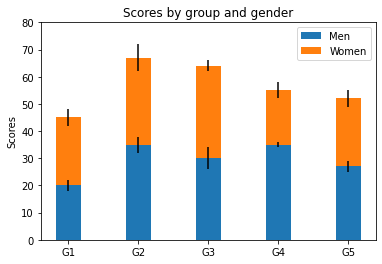

In [98]:
# I have no idea what this is

N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

#### Correlation

#### Anything Else?

In [112]:
corr_mat = train_c.corr()
corr_mat

,PassengerId,Age,Pclass,SibSp,Parch,FamSize,Fare,Survived
PassengerId,1.000000,0.035645,-0.035144,-0.057527,-0.001652,-0.040143,0.012658,-0.005007
Age,0.035645,1.000000,-0.337557,-0.294258,-0.215380,-0.308715,0.083863,-0.075827
Pclass,-0.035144,-0.337557,1.000000,0.083081,0.018443,0.065997,-0.549500,-0.338481
SibSp,-0.057527,-0.294258,0.083081,1.000000,0.414838,0.890712,0.159651,-0.035322
Parch,-0.001652,-0.215380,0.018443,0.414838,1.000000,0.783111,0.216225,0.081629
FamSize,-0.040143,-0.308715,0.065997,0.890712,0.783111,1.000000,0.217138,0.016639
Fare,0.012658,0.083863,-0.549500,0.159651,0.216225,0.217138,1.000000,0.257307
Survived,-0.005007,-0.075827,-0.338481,-0.035322,0.081629,0.016639,0.257307,1.000000


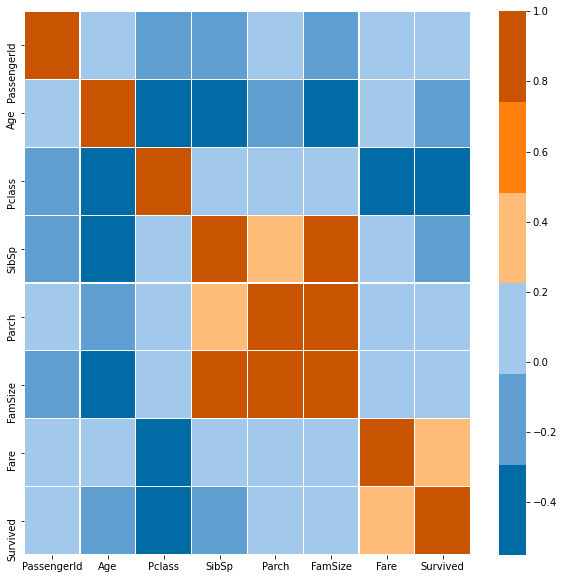

In [114]:
colorblind1 = ["#006ba4","#5f9ed1","#a2c8ec", "#ffbc79","#ff800e","#c85300"]

f, ax = plt.subplots(figsize =(10, 10)) 
sns.heatmap(corr_mat, ax = ax, cmap = sns.color_palette(colorblind1), linewidths = 0.1) 

In [120]:
col_names = []

for column in train_c:
    col_names.append(column)
col_names

['PassengerId',
 'Sex',
 'Age',
 'Title',
 'Pclass',
 'SibSp',
 'Parch',
 'FamSize',
 'Fare',
 'Embarked',
 'Deck',
 'Survived']

Text(0.5, 1.0, 'Age')

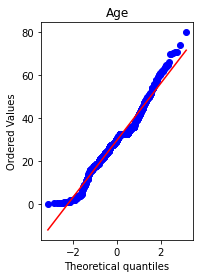

In [125]:
import scipy.stats as stats

fig = plt.figure()
ax = fig.add_subplot(121)
stats.probplot(train_c.Age, dist="norm", plot=plt)
ax.set_title('Age')

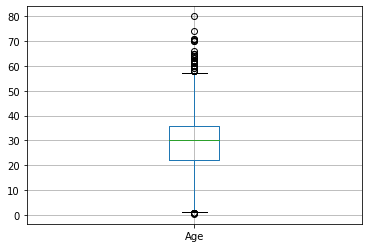

In [118]:
train_c[['Age']].boxplot()